# Intuition Plots

**Goal:** (Re)make some of the /classic/ NF plots 

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

## Step 1: Easy densities

In [2]:
def gaus(x, mu=0,std=1):
    y = np.exp(-0.5 * ((x-mu)/std)**2)
    y /= 1/(np.sqrt(2*np.pi)*std)
    return y

def unif(x, r=(0,1)):
    
    r_min, r_max = r
    dr = r_max - r_min
    
    y = np.where((x > r_min) & (x < r_max), 1/dr, 0)
    return y

In [76]:
def drawPlot(xx,yy, color,figName='',var_name='z'):
    '''
    Draw the plot for xx vs yy with color
    '''
    
    plt.figure(figsize=(4,3))

    plt.plot(xx,yy,color=color)
    
    ax = plt.gca()
    for spine in ['right','top']:
        ax.spines[spine].set_visible(False)

    xlim = xx[[0,-1]]    
    ylim = plt.ylim()
    
    
    # Add arrows on the plot
    # https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    ax.plot((xlim[1]), (ylim[0]), ls="", marker=">", 
            ms=12, color="k", clip_on=False)
    ax.plot((xlim[0]), (ylim[1]), ls="", marker="^", 
            ms=12, color="k", clip_on=False)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    ax.set_xlabel(var_name,fontsize=28)
    ax.set_ylabel(f'p({var_name})',fontsize=28)
    
    if figName:
        plt.savefig(figName,bbox_inches='tight')

In [4]:
if not os.path.exists('figures'):
    os.mkdir('figures')

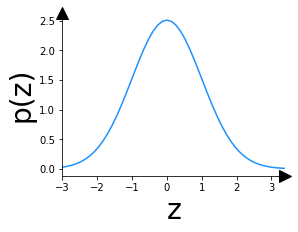

In [5]:
## Gaussian

xx = np.linspace(-3,3.4)
yy = gaus(xx)

drawPlot(xx,yy,'dodgerblue','figures/gaus_1d.pdf')

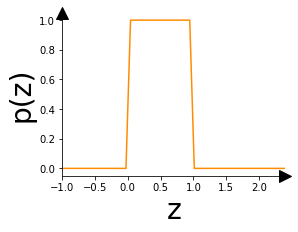

In [6]:
## Uniform

xx = np.linspace(-1,2.4)
yy = unif(xx)

drawPlot(xx,yy,'darkorange','figures/unif_1d.pdf')

[**Exponential distribution**](https://en.wikipedia.org/wiki/Exponential_distribution)

$$
f(x;\lambda) = \begin{cases}
\lambda e^{- \lambda x} \ & x \geq 0 \\
0, \quad & x \leq 0 
\end{cases}
$$

In [7]:
def exp(x, lmbda=1):
    
    y = np.where(x>=0,lmbda * np.exp(- lmbda * x),0)
    return y

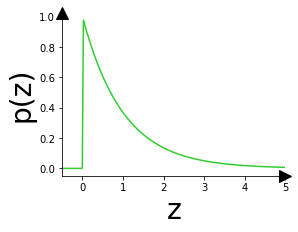

In [8]:
## Exp

xx = np.linspace(-0.5,5,201)
yy = exp(xx)

drawPlot(xx,yy,'limegreen','figures/exp_1d.pdf')

## Step 2: Basic density morphing

$$p_X(x) = p_Z(f^{-1}(x)) \left| \frac{d f^{-1}}{dz} \right| = p_Z(f^{-1}(x)) \frac{1}{\left| \frac{d f}{dx} \right|}$$


In [31]:
def sigmoid(x,beta=1):
    return 1/(1+np.exp(-beta * x))

def invSigmoid(x,beta=1):
    return np.log(x/(1-x))/beta
    
def dsigmoid(x,beta=1):
    y = sigmoid(x,beta) 
    
    return y*(1-y)

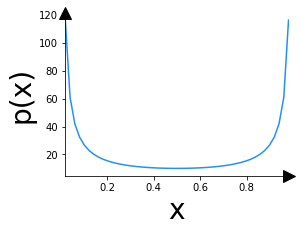

In [77]:
beta=10

xx = np.linspace(0,1)[1:-1]

zz = invSigmoid(xx,beta=beta)

yy = gaus(zz)/dsigmoid(zz,beta=beta)

# plt.plot(xx,yy)

drawPlot(xx,yy,'dodgerblue','figures/sigmoid_of_gauss.pdf',var_name='x')

**Ack... idk _why_ this isn't working...**

Let's try to reproduce Lukas's example!!

In [70]:
z = np.random.randn(1000)
x = sigmoid(z,beta=10)

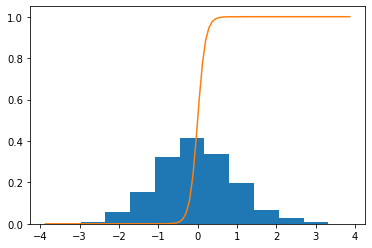

In [72]:
plt.hist(z,density=True)

plt.plot(zz,sigmoid(zz,beta=10))


In [54]:
import seaborn as sns

In [55]:
?sns.jointplot

Signature:
sns.jointplot(
    *,
    x=None,
    y=None,
    data=None,
    kind='scatter',
    color=None,
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    hue=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
x, y : vectors or keys in ``data``
    Variables that specify positions on the x and y axes.
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset 

/opt/conda/envs/rapids/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


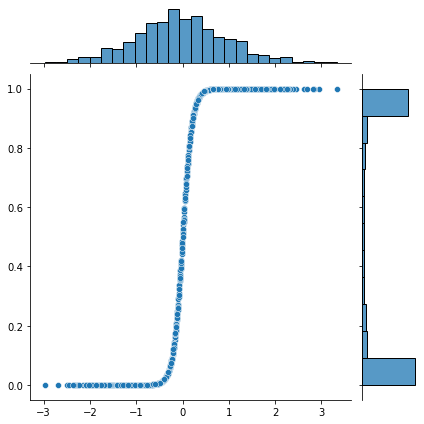

In [73]:
sns.jointplot(z,x)